<a href="https://colab.research.google.com/github/bkytpe/MachineLearning/blob/main/cnn_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test) = load_data()

In [17]:
# minst: reshape(50000,28,28,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [18]:
labels = [
          
          "airplane",
          "automobile",
          "bird",
          "cat",
          "deer",
          "dog",
          "car",
          "horse",
          "ship",
          "truck"
]

dog


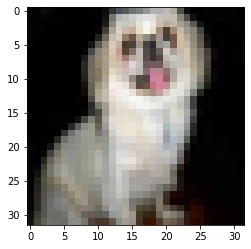

In [19]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
print(labels[y_train[idx][0]])
plt.imshow(x_train[idx])

In [20]:
#參考VG16概念

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
layers = [
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)), #64個3*3的過濾器
    MaxPooling2D(),
    Conv2D(128, 3, activation="relu", padding="same"),#卷積改變通道數，弛化改變長寬
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax") #分類器
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 512)        

- 1792:(3 * 3 * 3) * 64 + 64 #每個過濾器會重設及格點(臨界點) sum(wixi+bias)
- 73856: (3 * 3 * 64) * 128 + 128

In [21]:
x_train_norm = x_train/255 #卷積(cnn)可以接受大於一維的資料，所以不用reshape成一維
x_test_norm = x_test/255
x_train.shape

(50000, 32, 32, 3)

In [22]:
#fit前必須compile
#深度學習三步驟: 堆積木>決定跟正確距離(loss)>逐步調整(梯度下降)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["accuracy"])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    EarlyStopping(patience = 5,restore_best_weights=True),
    ModelCheckpoint("model.h5",save_best_only=True)
]
# validation_split: 切出一部分資料驗證
# batch_size: 看多少筆才做一次調整(梯度下降)
# epochs: 訓練次數(60000-6000筆/epoch)
# 1 epoch 多少次梯度下降: 54000 / 200 -> 270
# verbose: 印出多少log(1:default 0:quiet 2:)
model.fit(x_train_norm,
      y_train,
      validation_split = 0.1, 
      batch_size=200, #看多少筆做一次梯度下降
      epochs = 50,#模型訓練次數
      verbose = 2,#每次一行
      callbacks = callbacks)

Epoch 1/50
225/225 - 4s - loss: 1.7262 - accuracy: 0.3573 - val_loss: 1.5219 - val_accuracy: 0.4328
Epoch 2/50
225/225 - 3s - loss: 1.3226 - accuracy: 0.5170 - val_loss: 1.1824 - val_accuracy: 0.5732
Epoch 3/50
225/225 - 3s - loss: 1.1504 - accuracy: 0.5874 - val_loss: 1.0562 - val_accuracy: 0.6202
Epoch 4/50
225/225 - 3s - loss: 0.9976 - accuracy: 0.6460 - val_loss: 0.9711 - val_accuracy: 0.6524
Epoch 5/50
225/225 - 3s - loss: 0.9140 - accuracy: 0.6759 - val_loss: 0.9428 - val_accuracy: 0.6658
Epoch 6/50
225/225 - 3s - loss: 0.8295 - accuracy: 0.7082 - val_loss: 0.8730 - val_accuracy: 0.7052
Epoch 7/50
225/225 - 3s - loss: 0.7612 - accuracy: 0.7340 - val_loss: 0.7755 - val_accuracy: 0.7358
Epoch 8/50
225/225 - 3s - loss: 0.6960 - accuracy: 0.7545 - val_loss: 0.7306 - val_accuracy: 0.7472
Epoch 9/50
225/225 - 3s - loss: 0.6410 - accuracy: 0.7762 - val_loss: 0.7207 - val_accuracy: 0.7490
Epoch 10/50
225/225 - 3s - loss: 0.5919 - accuracy: 0.7928 - val_loss: 0.6978 - val_accuracy: 0.7576

In [24]:
model.evaluate(x_test_norm,y_test)
#[0.7615024447441101, 0.7405999898910522], [val_loss,val_accuracy]

313/313 [==============================] - 1s 3ms/step - loss: 0.6726 - accuracy: 0.7705


[0.6725897192955017, 0.7705000042915344]

In [26]:
y_test_r = y_test.reshape(-1) #-1:請你幫我算
y_test_r.shape

(10000,)

In [27]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
con_mat = confusion_matrix(y_test_r,pre) #出了tensorflow就帶原本的
pd.DataFrame(con_mat,index= ["{}(真實)".format(labels[i]) for i in range(10)],
             columns = ["{}(預測)".format(labels[i]) for i in range(10)]
             )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),car(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),814,12,22,19,14,9,10,15,66,19
automobile(真實),13,889,1,3,0,2,7,8,22,55
bird(真實),79,8,573,81,68,76,76,22,9,8
cat(真實),14,7,28,597,39,208,52,30,15,10
deer(真實),15,2,32,54,713,50,63,59,10,2
dog(真實),11,3,12,139,38,743,11,33,5,5
car(真實),4,2,29,63,19,22,850,2,7,2
horse(真實),11,1,19,46,45,56,7,803,3,9
ship(真實),47,22,3,14,4,4,7,2,883,14
truck(真實),35,67,2,11,2,7,5,14,17,840


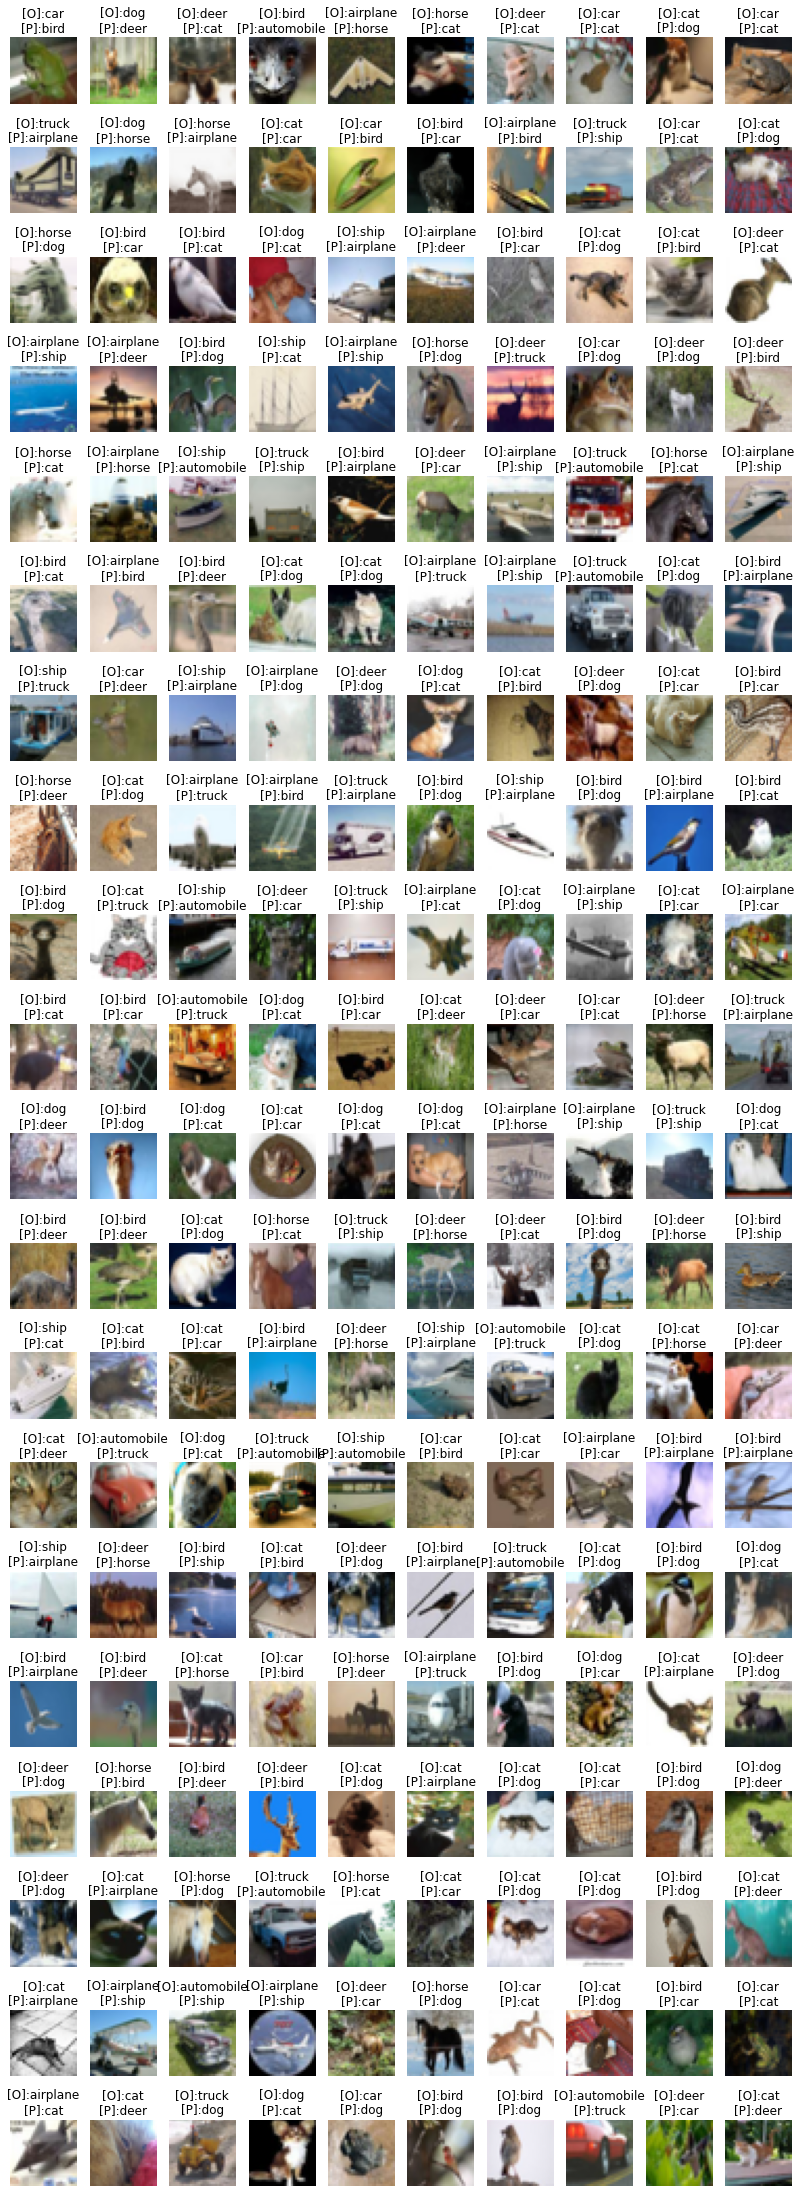

In [28]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200] #預測錯誤太多，只看前200筆
false_pre = pre[idx]
false_ori = y_test_r[idx]
false_img = x_test[idx]
plt.figure(figsize = (14,42))
width = 10
height = len(idx)//width + 1
for i in range(len(idx)):
    plt.subplot(height, width , i+1)
    t = "[O]:{}\n[P]:{}".format(labels[false_ori[i]], labels[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

url:https://www.funtime.com.tw/blog/wp-content/uploads/2017/06/1.png


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.997
automobile 的機率: 0.001
bird 的機率: 0.0
cat 的機率: 0.0
deer 的機率: 0.0
dog 的機率: 0.0
car 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.002
truck 的機率: 0.0
答案: airplane


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


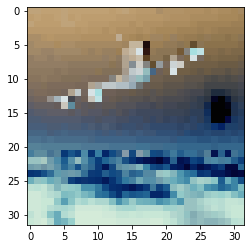

In [30]:
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
import requests
url = input("url:")
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=headers)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img = 1 - np.array(img) #黑轉白
img_r = img.reshape(1,32,32,3)/255 #一筆32*32*3的圖片
proba = model.predict(img_r)[0]
for i in range(10):
    print(labels[i], "的機率:", round(proba[i], 3))
ans = model.predict_classes(img_r)[0]
print("答案:", labels[ans])
plt.imshow(img, cmap="gray")
#https://www.funtime.com.tw/blog/wp-content/uploads/2017/06/1.png

#ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 32, 3)